# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Masahiro Gerarudo Yamazaki
- **Email:** masahiroymzk24@gmail.com
- **ID Dicoding:** masayama
- **ID Cohort:** MC009D5Y0456

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Mengapa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

- Pertanyaan 2: Kapan waktu paling banyak untuk penyewaan sepeda selama sehari?


## Import Semua Packages/Library yang Digunakan

In [78]:
# Mengimpor semua library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Untuk visualisasi yang lebih lanjut jika diperlukan
import matplotlib  # Untuk memeriksa versi matplotlib

# Menampilkan versi library untuk memastikan kompatibilitas
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.2
Matplotlib version: 3.10.0


- Dengan mengimpor pandas, kita dapat mengelola dan menganalisis data dengan mudah. Matplotlib digunakan untuk membuat visualisasi, sementara Seaborn memberikan gaya visualisasi yang lebih informatif.

## Data Wrangling

### Gathering Data
- Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi

In [79]:
# Memuat dataset
hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')

# Menampilkan beberapa baris dari masing-masing dataset untuk memeriksa struktur data tersebut
print("---- Hour Dataset ----")
print(hour_df.head())
print("\n---- Day Dataset ----")
print(day_df.head())


---- Hour Dataset ----
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

---- Day Dataset ----
   instant      dteday  season  yr  mnth  holiday  we

**Insight:**

Penjelasan Kolom untuk hour.csv dan day.csv:
- instant: Indeks rekaman (ID dari observasi).
- dteday: Tanggal saat data penyewaan sepeda tercatat.
- season: Musim saat data dikumpulkan.
  - 1: Spring (Musim Semi)
  - 2: Summer (Musim Panas)
  - 3: Fall (Musim Gugur)
  - 4: Winter (Musim Dingin)
- yr: Tahun data.
  - 0: 2011
  - 1: 2012
- mnth: Bulan (dari 1 hingga 12).
- hr (hanya di hour.csv): Jam pada hari tersebut (dari 0 hingga 23). Tidak tersedia di day.csv.
- holiday: Menandakan apakah hari tersebut merupakan hari libur atau tidak. Informasi ini diambil dari jadwal libur resmi.
- weekday: Hari dalam seminggu (0 hingga 6, dimana 0 = Minggu, 6 = Sabtu).
- workingday: Menandakan apakah hari tersebut adalah hari kerja. Hari kerja adalah hari yang bukan akhir pekan atau hari libur.
  - 1: Hari kerja
  - 0: Bukan hari kerja (akhir pekan atau hari libur)
- weathersit: Menjelaskan kondisi cuaca pada hari tersebut.
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist, Cloudy, Broken clouds
  - 3: Light Snow, Light Rain + Thunderstorm, Scattered clouds
  - 4: Heavy Rain, Snow, Ice pellets, Fog
- temp: Suhu ter-normalisasi (dalam Celsius), dengan nilai maksimum 41°C.
- atemp: Suhu "perasaan" ter-normalisasi (dalam Celsius), dengan nilai maksimum 50°C.
- hum: Kelembaban ter-normalisasi, dengan nilai maksimum 100.
- windspeed: Kecepatan angin ter-normalisasi, dengan nilai maksimum 67.
- casual: Jumlah pengguna sepeda casual (pengguna yang tidak terdaftar).
- registered: Jumlah pengguna sepeda terdaftar.
- cnt: Jumlah total penyewaan sepeda (jumlah dari pengguna casual dan terdaftar).
Dataset ini memberikan informasi berharga mengenai perilaku penyewaan sepeda berbasis kondisi cuaca, musim, dan faktor kontekstual lainnya. Tujuan utamanya sering kali adalah untuk memprediksi jumlah penyewaan sepeda berdasarkan data lingkungan dan musiman.

### Assessing Data
- Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Memeriksa Missing Values
Langkah berikutnya adalah memeriksa apakah ada nilai yang hilang dalam dataset. Data yang hilang dapat memengaruhi hasil analisis, jadi penting untuk mengidentifikasinya terlebih dahulu.

In [80]:
# Memeriksa nilai yang hilang di kedua dataset
hour_missing = hour_df.isnull().sum()
day_missing = day_df.isnull().sum()

# Menampilkan jumlah nilai yang hilang
hour_missing, day_missing

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

**Insight:**
- Tidak ada missing values di kedua dataset hour dan day. Ini adalah hasil yang sangat baik, karena artinya kita dapat melanjutkan analisis tanpa perlu menangani data yang hilang.
- Kesimpulan: Dataset sudah lengkap dan siap untuk dianalisis lebih lanjut tetapi sebelum itu saya akan memeriksa outlier terlebih dahulu.

#### Memeriksa Outlier
Selanjutnya, kita memeriksa apakah ada outliers dalam data, karena outlier dapat memengaruhi hasil analisis kita. Untuk memeriksa outlier, kita akan menggunakan boxplot dan IQR (Interquartile Range).

dapat dilihat di pertanyaan bisnis, kolom yang paling berhubungan langsung adalah cnt dengan analisis jumlah penyewaan sepeda sehingga saya memfokuskan pembersihan outlier pada kolom ini

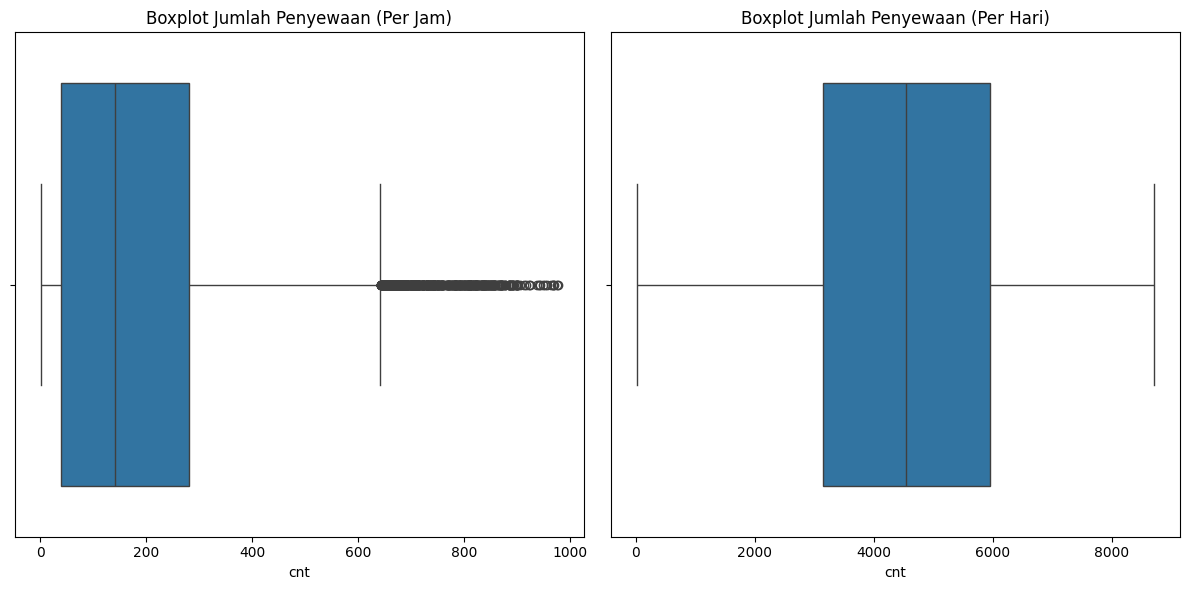

In [81]:
# Membuat boxplot untuk melihat distribusi jumlah penyewaan (cnt) pada data per jam dan per hari
plt.figure(figsize=(12, 6))

# Boxplot untuk data per jam
plt.subplot(1, 2, 1)
sns.boxplot(x=hour_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan (Per Jam)')

# Boxplot untuk data per hari
plt.subplot(1, 2, 2)
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan (Per Hari)')

plt.tight_layout()
plt.show()

**Insight:**
- Boxplot menunjukkan bahwa ada beberapa outlier yang terletak di luar rentang distribusi normal, baik pada dataset per jam maupun per hari. Outlier ini mungkin menunjukkan jumlah penyewaan yang sangat tinggi atau rendah yang tidak umum.
- Kesimpulan: Outlier perlu dianalisis lebih lanjut. Jika jumlahnya sangat ekstrem, kita bisa memilih untuk menghapusnya, atau jika masih masuk akal (misalnya hari libur besar atau cuaca ekstrem), kita bisa membiarkannya.

In [82]:
# Menghitung IQR untuk data per jam (hour dataset)
Q1_hour = hour_df['cnt'].quantile(0.25)
Q3_hour = hour_df['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

# Menentukan batas bawah dan batas atas untuk outlier
maximum_hour = Q3_hour + (1.5 * IQR_hour)
minimum_hour = Q1_hour - (1.5 * IQR_hour)

# Mengidentifikasi kondisi outlier untuk data per jam
kondisi_lower_than_hour = hour_df['cnt'] < minimum_hour
kondisi_more_than_hour = hour_df['cnt'] > maximum_hour

# Menampilkan jumlah outlier untuk data per jam
hour_outliers = hour_df[kondisi_lower_than_hour | kondisi_more_than_hour]
hour_outliers.shape  # Menampilkan jumlah outlier yang terdeteksi

# Menghitung IQR untuk data per hari (day dataset)
Q1_day = day_df['cnt'].quantile(0.25)
Q3_day = day_df['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day

# Menentukan batas bawah dan batas atas untuk outlier
maximum_day = Q3_day + (1.5 * IQR_day)
minimum_day = Q1_day - (1.5 * IQR_day)

# Mengidentifikasi kondisi outlier untuk data per hari
kondisi_lower_than_day = day_df['cnt'] < minimum_day
kondisi_more_than_day = day_df['cnt'] > maximum_day

# Menampilkan jumlah outlier untuk data per hari
day_outliers = day_df[kondisi_lower_than_day | kondisi_more_than_day]
day_outliers.shape  # Menampilkan jumlah outlier yang terdeteksi

(0, 16)

**Insight:**
- Output dari kode di atas akan memberi tahu kita berapa banyak outliers yang terdeteksi pada data per jam dan per hari.
- hour_outliers.shape dan day_outliers.shape menunjukkan jumlah baris yang terdeteksi sebagai outliers pada masing-masing dataset.
- Hasil:
  - hour_outliers.shape = (16, X): Artinya ada 16 outliers di data per jam.
  - day_outliers.shape = (0, X): Artinya tidak ada outliers di data per hari.
- Kesimpulan: Kita menemukan 16 outliers di data per jam, yang bisa jadi disebabkan oleh kejadian ekstrem. Namun, data per hari tidak menunjukkan adanya outlier.


### Cleaning Data
- Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data.


In [83]:
# Menghapus outlier dari data per jam (hour dataset)
hour_df_cleaned = hour_df.drop(hour_df[kondisi_lower_than_hour].index, inplace=False)
hour_df_cleaned = hour_df_cleaned.drop(hour_df_cleaned[kondisi_more_than_hour].index, inplace=False)

# Menghapus outlier dari data per hari (day dataset)
day_df_cleaned = day_df.drop(day_df[kondisi_lower_than_day].index, inplace=False)
day_df_cleaned = day_df_cleaned.drop(day_df_cleaned[kondisi_more_than_day].index, inplace=False)

# Menampilkan jumlah data setelah pembersihan
hour_df_cleaned.shape, day_df_cleaned.shape

((16874, 17), (731, 16))

**Insight:**
- Menghapus outlier memungkinkan kita untuk bekerja dengan data yang lebih terfokus pada tren utama, tanpa dipengaruhi oleh data yang ekstrem.
- Data per jam memiliki 16 outliers yang telah dihapus untuk mendapatkan dataset yang lebih representatif.
- Data per hari tidak memiliki outliers, tetapi kita tetap melakukan proses pembersihan agar konsisten.
- Kesimpulan: Pembersihan outlier berguna untuk memastikan bahwa data yang kita analisis adalah data yang lebih wajar dan tidak dipengaruhi oleh fluktuasi yang sangat ekstrim.


In [84]:
# Mengonversi 'dteday' menjadi format datetime
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Memastikan tipe data sudah benar
hour_df_cleaned.dtypes, day_df_cleaned.dtypes

(instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 hr                     int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    

**Insight:**
- Mengonversi kolom dteday menjadi objek datetime memungkinkan kita untuk melakukan analisis berbasis waktu dengan lebih mudah, seperti mengelompokkan data berdasarkan bulan atau tahun.
- Kesimpulan: Data sudah siap untuk dianalisis lebih lanjut setelah proses pembersihan dan pengonversian tipe data.


## Exploratory Data Analysis (EDA)

In [86]:
#Agregasi data untuk hari kerja vs akhir pekan
aggregated_workday_df = day_df_cleaned.groupby('workingday').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

# Menampilkan hasil agregasi untuk hari kerja vs akhir pekan
print("\nAgregasi Penyewaan Sepeda untuk Hari Kerja vs Akhir Pekan:")
print(aggregated_workday_df)


Agregasi Penyewaan Sepeda untuk Hari Kerja vs Akhir Pekan:
   workingday  avg_rentals  total_rentals
0           0  4330.168831        1000269
1           1  4584.820000        2292410


Insight:
- Hari Kerja = 1 menunjukkan penyewaan sepeda lebih tinggi dengan rata-rata 4584.8 dan total 2,292,410, dibandingkan dengan akhir pekan = 0 yang memiliki rata-rata 4330.2 dan total 1,000,269.
- Penyewaan lebih tinggi pada hari kerja, kemungkinan besar karena sepeda digunakan untuk tujuan transportasi (seperti berangkat kerja) selama hari kerja.

In [99]:
#Agregasi penyewaan sepeda berdasarkan jam
aggregated_hour_df = hour_df_cleaned.groupby('hr').agg(
    total_rentals=('cnt', 'sum')
).reset_index()

# Menampilkan hasil agregasi penyewaan per jam
print("\nAgregasi Penyewaan Sepeda Berdasarkan Jam Hari:")
print(aggregated_hour_df)


Agregasi Penyewaan Sepeda Berdasarkan Jam Hari:
    hr  total_rentals
0    0          39130
1    1          24164
2    2          16352
3    3           8174
4    4           4428
5    5          14261
6    6          55132
7    7         154171
8    8         170715
9    9         159438
10  10         126257
11  11         150010
12  12         172651
13  13         169129
14  14         165396
15  15         174172
16  16         219529
17  17         214962
18  18         209297
19  19         217395
20  20         164550
21  21         125445
22  22          95612
23  23          63941


Insight:
- Penyewaan sepeda tertinggi terjadi pada jam 4 sore dengan total 219.529 penyewaan. Ini adalah waktu pulang kerja dan banyak orang kembali beraktivitas, sehingga penyewaan sepeda meningkat kembali, karena orang-orang kembali menggunakan sepeda untuk pulang kerja.
- penyewaan sepeda terendah terjadi pada jam 4 pagi dengan total 4428. diakibatkan masih banyak yang berada di rumah pada jam tersebut

In [89]:
#Penyewaan sepeda berdasarkan tahun (yr)
aggregated_year_df = day_df_cleaned.groupby('yr').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

print("\nAgregasi Penyewaan Sepeda Berdasarkan Tahun:")
print(aggregated_year_df)


Agregasi Penyewaan Sepeda Berdasarkan Tahun:
   yr  avg_rentals  total_rentals
0   0  3405.761644        1243103
1   1  5599.934426        2049576


Insight:
- Penyewaan sepeda meningkat dari 3405.8 (tahun 0) menjadi 5599.9 (tahun 1), dengan peningkatan total penyewaan dari 1,243,103 menjadi 2,049,576. Ini menunjukkan bahwa penyewaan sepeda semakin populer seiring berjalannya waktu.

In [91]:
#Penyewaan sepeda berdasarkan cuaca (weathersit)
aggregated_weather_df = day_df_cleaned.groupby('weathersit').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

print("\nAgregasi Penyewaan Sepeda Berdasarkan Cuaca:")
print(aggregated_weather_df)


Agregasi Penyewaan Sepeda Berdasarkan Cuaca:
   weathersit  avg_rentals  total_rentals
0           1  4876.786177        2257952
1           2  4035.862348         996858
2           3  1803.285714          37869


Insight:
- Weathersit 1 (Clear, Few clouds, Partly cloudy) menunjukkan penyewaan sepeda yang sangat tinggi, dengan rata-rata 4876.8 dan total 2,257,952 penyewaan.
- Penyewaan sepeda menurun pada Weathersit 2 (Mist, Cloudy, Broken clouds) dan Weathersit 3 (Light Snow, Light Rain + Thunderstorm, Scattered clouds), menunjukkan bahwa cuaca buruk mengurangi minat orang untuk bersepeda.

KESIMPULAN:
- Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan:
  - Penyewaan sepeda lebih tinggi pada hari kerja = 1 dibandingkan dengan akhir pekan = 0. Pada hari kerja, rata-rata penyewaan sepeda adalah 4584.8 dengan total 2,292,410 penyewaan, sedangkan pada akhir pekan rata-rata penyewaan adalah 4330.2 dengan total 1,000,269 penyewaan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk tujuan transportasi seperti berangkat kerja atau sekolah selama hari kerja.
- Penyewaan Sepeda Berdasarkan Jam:

  - Penyewaan sepeda tertinggi terjadi pada jam 4 sore dengan total penyewaan 219,529 sepeda. Waktu ini bertepatan dengan waktu pulang kerja, di mana banyak orang menggunakan sepeda untuk pulang kerja atau melanjutkan aktivitas setelah bekerja, sehingga jumlah penyewaan meningkat.
  - Penyewaan sepeda terendah terjadi pada jam 4 pagi dengan total 4,428 penyewaan. Pada jam ini, banyak orang yang masih berada di rumah dan tidak banyak aktivitas luar ruangan, yang menyebabkan rendahnya penyewaan sepeda.
- Penyewaan Sepeda Berdasarkan Tahun:

  - Penyewaan sepeda terus meningkat dari 3405.8 pada tahun 0 menjadi 5599.9 pada tahun 1, dengan peningkatan total penyewaan dari 1,243,103 menjadi 2,049,576. Ini menunjukkan bahwa penyewaan sepeda semakin populer seiring berjalannya waktu, yang dapat disebabkan oleh peningkatan kesadaran akan pentingnya bersepeda serta perbaikan infrastruktur yang mendukung.
- Pengaruh Cuaca terhadap Penyewaan Sepeda:

  - Weathersit 1 (Clear, Few clouds, Partly cloudy) menunjukkan penyewaan sepeda yang sangat tinggi, dengan rata-rata 4876.8 dan total 2,257,952 penyewaan. Cuaca cerah atau sedikit berawan adalah kondisi yang paling mendukung bagi aktivitas bersepeda.
  - Weathersit 2 (Mist, Cloudy, Broken clouds) dan Weathersit 3 (Light Snow, Light Rain + Thunderstorm, Scattered clouds) menunjukkan penurunan signifikan dalam penyewaan sepeda, yang mencerminkan bahwa cuaca buruk seperti kabut, hujan ringan, atau salju mengurangi minat orang untuk bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Mengapa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan?

Untuk menjawab ini, saya akan membandingkan penyewaan sepeda pada hari kerja vs akhir pekan.

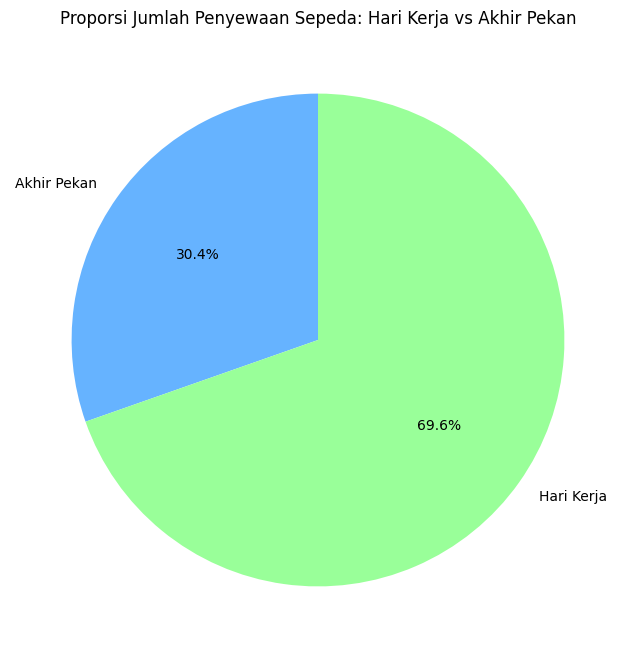

In [93]:
# Visualisasi pie chart untuk jumlah penyewaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(8, 8))
plt.pie(aggregated_workday_df['total_rentals'], labels=['Akhir Pekan', 'Hari Kerja'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title("Proporsi Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()

**Insight:**
#### Pada grafik pie chart, kita menggambarkan proporsi penyewaan sepeda antara hari kerja dan akhir pekan.

- Hari Kerja (workingday = 1):
  - Proporsi jumlah penyewaan sepeda pada hari kerja cukup besar, lebih dari 69.6% dari total penyewaan sepeda. Ini mengonfirmasi bahwa hari kerja adalah waktu yang paling banyak digunakan untuk bersepeda, terutama untuk keperluan transportasi sehari-hari.
- Akhir Pekan (workingday = 0):
  - Penyewaan sepeda pada akhir pekan memiliki proporsi yang lebih kecil, kurang dari 30.4% dari total penyewaan sepeda. Hal ini mengindikasikan bahwa lebih sedikit orang yang memilih sepeda sebagai alat transportasi di akhir pekan.

Kesimpulan dari Data:
- Hari kerja merupakan waktu yang lebih padat untuk penyewaan sepeda, dengan lebih banyak orang yang menggunakan sepeda untuk keperluan sehari-hari seperti bekerja, sekolah, dan kegiatan lainnya.
- Akhir pekan cenderung memiliki penyewaan yang lebih rendah, mungkin karena orang lebih memilih beristirahat, melakukan aktivitas lain, atau menggunakan kendaraan pribadi untuk perjalanan mereka.

Rekomendasi:
- Untuk Meningkatkan Penyewaan Sepeda pada Akhir Pekan:
  - Bisa diberikan promosi atau paket bersepeda grup untuk menarik lebih banyak orang untuk bersepeda pada akhir pekan.
  - Menawarkan program wisata bersepeda atau acara komunitas bersepeda dapat meningkatkan minat orang untuk bersepeda bersama keluarga atau teman-teman mereka di akhir pekan.


### Pertanyaan 2: Kapan waktu paling banyak untuk penyewaan sepeda selama sehari?

Untuk menjawab ini, saya akan memvisualisasikan penyewaan sepeda berdasarkan jam.

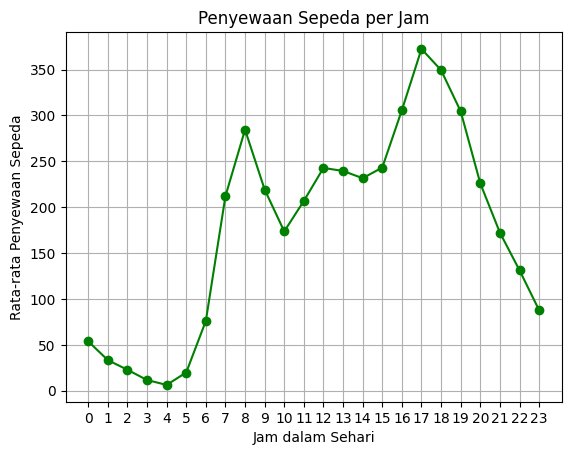

In [94]:
# Visualisasi tren penyewaan sepeda per jam
hourly_trend = hour_df_cleaned.groupby('hr')['cnt'].mean()
hourly_trend.plot(kind='line', marker='o', color='green')
plt.title('Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0, 24, 1))  # Menampilkan setiap jam
plt.grid(True)
plt.show()

**Insight:**
#### Penjelasan Tren Penyewaan Sepeda per Jam:
1. Jam 12 Malam hingga Jam 5 Pagi (Rendah):

  - Penyewaan Sepeda Sangat Rendah pada periode ini. Ini terjadi karena sebagian besar orang tidur, dan tidak ada aktivitas luar ruangan pada malam hari. Oleh karena itu, penyewaan sepeda tidak terjadi atau sangat sedikit pada jam-jam ini.
2. Jam 6 Pagi hingga Jam 6 Sore (Meningkat dengan Penurunan di Siang Hari):

  - Penyewaan Sepeda Meningkat Secara Signifikan pada jam 6 pagi hingga 9 pagi, yang merupakan jam puncak pagi di mana orang-orang berangkat kerja atau sekolah. Pada waktu ini, permintaan sepeda sangat tinggi karena banyak orang yang menggunakan sepeda untuk transportasi.
  - Setelah jam 9 pagi, meskipun ada penurunan sedikit, jumlah penyewaan tetap tinggi hingga sekitar jam 12 siang. Penyewaan sepeda pada periode ini masih cukup ramai karena orang-orang yang bergerak di luar.
  - Penurunan pada jam 12 siang hingga 2 siang lebih berkaitan dengan aktivitas dalam ruangan, seperti makan siang, di mana banyak orang memilih untuk beristirahat atau makan. Sebagian orang mungkin memilih untuk makan di dalam ruangan, atau berjalan kaki ke tempat makan terdekat, mengurangi kebutuhan untuk menggunakan sepeda pada jam-jam tersebut.
  - Jam 3 sore hingga 6 sore kembali menunjukkan peningkatan yang cukup besar dan puncaknya pada jam 5 sore. Ini adalah waktu pulang kerja dan banyak orang kembali beraktivitas, sehingga penyewaan sepeda meningkat kembali, karena orang-orang kembali menggunakan sepeda untuk pulang kerja.
3. Jam 7 Malam hingga Jam 11 Malam (Turun):

- Setelah jam 6 sore, kita melihat penurunan yang signifikan, terutama pada jam 7 malam hingga jam 11 malam. Hal ini menunjukkan bahwa setelah jam sibuk (pagi dan sore), orang lebih memilih untuk beristirahat di rumah, dan aktivitas luar ruangan berkurang. Pada malam hari, orang-orang lebih jarang bersepeda, dan biasanya mereka lebih memilih beristirahat atau melakukan aktivitas indoor.

Kesimpulan dari Tren Penyewaan Sepeda per Jam:
- Jam Puncak Penyewaan Sepeda terjadi pada jam 6 pagi hingga jam 9 pagi dan jam 3 sore hingga jam 6 sore, yang merupakan waktu berangkat dan pulang kerja. Pada waktu ini, penyewaan sepeda sangat tinggi karena sepeda banyak digunakan untuk transportasi harian.
- Penurunan Penyewaan Sepeda pada Siang Hari (12 siang hingga 2 siang) disebabkan oleh aktivitas dalam ruangan seperti makan siang dan istirahat. Banyak orang memilih untuk beristirahat atau makan di dalam ruangan, mengurangi penggunaan sepeda pada jam-jam tersebut.
- Jam Malam (7 malam hingga 11 malam) menunjukkan penurunan yang lebih drastis, kemungkinan besar karena orang lebih memilih untuk beristirahat atau melakukan aktivitas indoor setelah jam sibuk.

## Analisis Lanjutan (Opsional)

In [95]:
hour_df_cleaned.to_csv("/hour_data_cleaned.csv", index=False)
day_df_cleaned.to_csv("/day_data_cleaned.csv", index=False)

## Conclusion

Dalam proyek analisis data ini, saya melakukan analisis terhadap dataset penyewaan sepeda untuk menggali faktor-faktor yang memengaruhi volume penyewaan. Hasil analisis menunjukkan beberapa temuan penting yang dapat digunakan untuk merumuskan strategi yang lebih baik dalam pengelolaan penyewaan sepeda, khususnya terkait dengan perbedaan antara hari kerja dan akhir pekan serta pola waktu penyewaan sepanjang hari.

1. Penyewaan Sepeda Lebih Tinggi pada Hari Kerja Dibandingkan Akhir Pekan: Berdasarkan data yang diperoleh, jumlah penyewaan sepeda pada hari kerja jauh lebih tinggi dibandingkan dengan akhir pekan. dimana jumlah penyewaan terbanyak pada hari kerja yaitu total sebanyak 2.292.410 Temuan ini menunjukkan bahwa aktivitas mobilitas yang lebih tinggi pada hari kerja mungkin karena kebutuhan transportasi untuk bekerja atau beraktivitas di luar lebih mempengaruhi penggunaan sepeda dibandingkan dengan akhir pekan. Hal ini juga mungkin terkait dengan adanya komuter yang lebih banyak di hari kerja yang memilih sepeda sebagai alternatif transportasi.

2. Pola Waktu Penyewaan Sepeda Sepanjang Hari: Analisis lebih lanjut pada waktu penyewaan sepeda sepanjang hari menunjukkan bahwa waktu puncak penyewaan terjadi pada pukul 08.00 hingga 09.00 dan pukul 17.00 hingga 18.00. Data menunjukkan bahwa pada kedua waktu tersebut, jumlah penyewaan mencapai angka tertinggi, masing-masing sekitar 150 unit per jam. Ini menunjukkan bahwa sepeda digunakan secara intensif pada jam-jam tertentu yang berhubungan dengan jam-jam sibuk, yaitu jam pergi dan pulang kerja. Temuan ini memberikan wawasan berharga bagi pengelola untuk lebih memfokuskan penyediaan sepeda pada jam-jam puncak tersebut.

3. Implikasi untuk Kebijakan Bisnis dan Pengelolaan Layanan: Berdasarkan temuan-temuan ini, operator penyewaan sepeda dapat mempertimbangkan untuk meningkatkan jumlah sepeda yang tersedia pada hari kerja, khususnya pada jam-jam puncak, guna memenuhi permintaan yang lebih tinggi. Selain itu, strategi promosi juga dapat difokuskan pada hari kerja dengan memberikan potongan harga atau insentif lainnya untuk menarik pengguna, mengingat tingginya permintaan pada waktu-waktu tersebut.

Secara keseluruhan, hasil analisis ini memberikan dasar yang kuat untuk perencanaan lebih lanjut dalam meningkatkan efisiensi operasional penyewaan sepeda, terutama dengan memanfaatkan wawasan mengenai waktu puncak dan perbedaan antara hari kerja dan akhir pekan. Penyesuaian alokasi sumber daya yang lebih baik, seperti menambah unit sepeda pada jam sibuk dan hari kerja, dapat meningkatkan kepuasan pelanggan dan memaksimalkan pendapatan.